In [0]:
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Activation, Concatenate
from keras import optimizers
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
batch_size = 128
epochs = 100
lr0 = 0.1

In [0]:
def linear_decay(epoch):
    epochs_drop = 20
    drop = 0.5
    lrate = lr0 * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
    return lrate

lrate = LearningRateScheduler(linear_decay)

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 20s 0us/step


In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.1)

In [0]:
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
    )

valid_datagen = ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization=True
)

test_datagen = ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization=True
)

In [0]:
train_datagen.fit(x_train)
valid_datagen.fit(x_valid)
test_datagen.fit(x_test)

In [0]:
def Alexnet(height, width, channel):
    inputs = Input(shape=(height, width, channel))
    conv1 = Conv2D(96, kernel_size=(3, 3), strides=(2, 2),  padding='same', activation='relu', name = 'Conv1')(inputs)
    maxpool1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='Maxpool1')(conv1)
    batch1 = BatchNormalization(name='Batch1')(maxpool1)
    
    conv2 = Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same', name='Conv2')(batch1)
    maxpool2 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='Maxpool2')(conv2)
    batch2 = BatchNormalization(name='Batch2')(maxpool2)
    
    conv3 = Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same', name='Conv3')(batch2)
    conv4 = Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same', name='Conv4')(conv3)
    conv5 = Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same',  name='Conv5')(conv4)
    maxpool5 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='Maxpool5')(conv5)
    batch5 = BatchNormalization(name='Batch5')(maxpool5)
    
    flatten = Flatten()(batch5)
    fc1 = Dense(4096, activation='relu', name='Fc1')(flatten)
    dropout1 = Dropout(rate=0.5, name="Dropout1")(fc1)
    fc2 = Dense(4096, activation='relu', name='Fc2')(dropout1)
    dropout2 = Dropout(rate=0.5, name="Dropout2")(fc2)
    fc3 = Dense(10, activation='softmax')(dropout2)
    
    Alexnet = Model(inputs = inputs, outputs = fc3)
    return Alexnet

In [0]:
alexnet = Alexnet(32, 32, 3)
sgd = SGD(lr = lr0, momentum = 0.9, decay=0.0002, nesterov=False)
alexnet.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
callbacks_list = [lrate]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
alexnet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 16, 16, 96)        2688      
_________________________________________________________________
Maxpool1 (MaxPooling2D)      (None, 8, 8, 96)          0         
_________________________________________________________________
Batch1 (BatchNormalization)  (None, 8, 8, 96)          384       
_________________________________________________________________
Conv2 (Conv2D)               (None, 8, 8, 256)         614656    
_________________________________________________________________
Maxpool2 (MaxPooling2D)      (None, 3, 3, 256)         0         
_________________________________________________________________
Batch2 (BatchNormalization)  (None, 3, 3, 256)         1024      
__________

In [0]:
alexnet_his = alexnet.fit_generator(train_datagen.flow(x_train, y_train, batch_size=batch_size), 
                                    steps_per_epoch = len(x_train) / batch_size, 
                                    epochs = epochs, 
                                   validation_data=valid_datagen.flow(x_valid, y_valid, batch_size=batch_size),
                                   validation_steps=len(x_valid) / batch_size,
                                   callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
352/351 [==============================] - 37s 105ms/step - loss: 1.8827 - acc: 0.3270 - val_loss: 1.6720 - val_acc: 0.4014
Epoch 2/100
352/351 [==============================] - 32s 91ms/step - loss: 1.4428 - acc: 0.4828 - val_loss: 1.2685 - val_acc: 0.5338
Epoch 3/100
352/351 [==============================] - 32s 91ms/step - loss: 1.2504 - acc: 0.5569 - val_loss: 1.1878 - val_acc: 0.5742
Epoch 4/100
352/351 [==============================] - 32s 91ms/step - loss: 1.1098 - acc: 0.6102 - val_loss: 1.0351 - val_acc: 0.6410
Epoch 5/100
352/351 [==============================] - 32s 91ms/step - loss: 1.0275 - acc: 0.6394 - val_loss: 0.9757 - val_acc: 0.6468
Epoch 6/100
352/351 [==============================] - 32s 91ms/step - loss: 0.9478 - acc: 0.6702 - val_loss: 1.0908 - val_acc: 0.6264
Epoch 7/100
352/351 [==============================] - 32s 91ms/step - loss: 0.8893 - acc: 0.6918 - val_loss: 0.9100 - val_acc: 0.6854
Epoch 

In [0]:
results = alexnet.evaluate_generator(test_datagen.flow(x_test, y_test, batch_size=batch_size), steps=len(x_test) / batch_size)
print("Test Accuracy %f" % (results[1] * 100))

Test Accuracy 79.280000


In [0]:
def fire_module(x, s1x1, e1x1, e3x3, name):
    #Squeeze layer
    squeeze = Conv2D(s1x1, (1, 1), activation='relu', padding='valid', kernel_initializer='glorot_uniform', name = name + 's1x1')(x)
    squeeze_bn = BatchNormalization(name=name+'sbn')(squeeze)
    
    #Expand 1x1 layer and 3x3 layer are parallel

    #Expand 1x1 layer
    expand1x1 = Conv2D(e1x1, (1, 1), activation='relu', padding='valid', kernel_initializer='glorot_uniform', name = name + 'e1x1')(squeeze_bn)
    
    #Expand 3x3 layer
    expand3x3 = Conv2D(e3x3, (3, 3), activation='relu', padding='same', kernel_initializer='glorot_uniform', name = name +  'e3x3')(squeeze_bn)
    
    #Concatenate expand1x1 and expand 3x3 at filters
    output = Concatenate(axis = 3, name=name)([expand1x1, expand3x3])
    
    return output

In [0]:
def SqueezeNet(height, width, channel):
    inputs = Input(shape=(height, width, channel))
    conv1 = Conv2D(96, kernel_size=(3, 3), strides=(2, 2),  padding='same', activation='relu', name = 'Conv1')(inputs)
    maxpool1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='Maxpool1')(conv1)
    batch1 = BatchNormalization(name='Batch1')(maxpool1)
#     fire2 = fire_module(batch1, 16, 64, 64, "Fire2")
#     fire3 = fire_module(fire2, 16, 64, 64, "Fire3")
    fire4 = fire_module(batch1, 32, 128, 128, "Fire2")
    maxpool4 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='Maxpool2')(fire4)
#     fire5 = fire_module(maxpool4, 32, 128, 128, "Fire5")
    fire6 = fire_module(maxpool4, 48, 192, 192, "Fire3")
    fire7 = fire_module(fire6, 48, 192, 192, "Fire4")
    fire8 = fire_module(fire7, 48, 192, 192, "Fire5")
    maxpool8 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='Maxpool5')(fire8)
#     fire9 = fire_module(maxpool8, 64, 256, 256, "Fire9")
    dropout = Dropout(0.5, name="Dropout")(maxpool8)
    conv10 = Conv2D(10, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='relu', name='Conv6')(dropout)
    batch10 = BatchNormalization(name='Batch6')(conv10)
    avgpool10 = GlobalAveragePooling2D(name='GlobalAvgPool6')(batch10)
    softmax = Activation('softmax')(avgpool10)
    
    squeezenet = Model(inputs=inputs, outputs=softmax)
    return squeezenet

In [0]:
squeezenet = SqueezeNet(32, 32, 3)
sgd = SGD(lr = lr0, momentum = 0.9, nesterov=False)
squeezenet.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [0]:
squeezenet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 16, 16, 96)   2688        input_2[0][0]                    
__________________________________________________________________________________________________
Maxpool1 (MaxPooling2D)         (None, 8, 8, 96)     0           Conv1[0][0]                      
__________________________________________________________________________________________________
Batch1 (BatchNormalization)     (None, 8, 8, 96)     384         Maxpool1[0][0]                   
__________________________________________________________________________________________________
Fire4s1x1 

In [18]:
squeezenet_his = squeezenet.fit_generator(train_datagen.flow(x_train, y_train, batch_size=batch_size), 
                                    steps_per_epoch = len(x_train) / batch_size, 
                                    epochs = epochs, 
                                   validation_data=valid_datagen.flow(x_valid, y_valid, batch_size=batch_size),
                                   validation_steps=len(x_valid) / batch_size,
                                          callbacks=callbacks_list)

Epoch 1/100
352/351 [==============================] - 33s 95ms/step - loss: 1.7137 - acc: 0.3617 - val_loss: 1.6594 - val_acc: 0.4262
Epoch 2/100
352/351 [==============================] - 31s 88ms/step - loss: 1.3770 - acc: 0.5046 - val_loss: 1.6032 - val_acc: 0.4656
Epoch 3/100
352/351 [==============================] - 31s 89ms/step - loss: 1.2204 - acc: 0.5679 - val_loss: 1.2208 - val_acc: 0.5752
Epoch 4/100
352/351 [==============================] - 32s 90ms/step - loss: 1.1084 - acc: 0.6095 - val_loss: 1.2380 - val_acc: 0.5802
Epoch 5/100
352/351 [==============================] - 32s 90ms/step - loss: 1.0385 - acc: 0.6364 - val_loss: 1.0173 - val_acc: 0.6424
Epoch 6/100
352/351 [==============================] - 32s 90ms/step - loss: 0.9799 - acc: 0.6560 - val_loss: 0.9194 - val_acc: 0.6838
Epoch 7/100
352/351 [==============================] - 32s 89ms/step - loss: 0.9419 - acc: 0.6731 - val_loss: 1.0988 - val_acc: 0.6146
Epoch 8/100
352/351 [==============================] - 

In [19]:
results = squeezenet.evaluate_generator(test_datagen.flow(x_test, y_test, batch_size=batch_size), steps=len(x_test) / batch_size)
print("Test Accuracy %f" % (results[1] * 100))

Test Accuracy 80.290000


## **Plot**

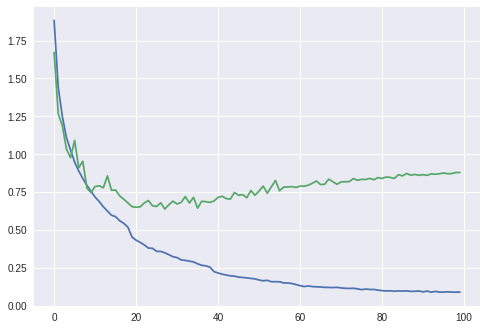

In [20]:
plt.plot(alexnet_his.history['loss'])
plt.plot(alexnet_his.history['val_loss'])

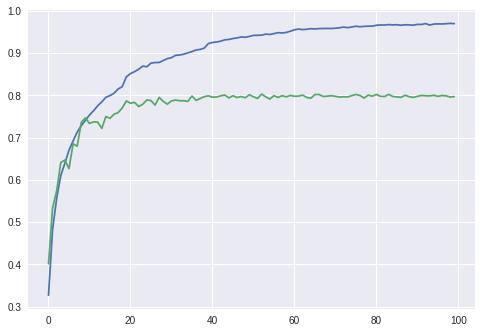

In [21]:
plt.plot(alexnet_his.history['acc'])
plt.plot(alexnet_his.history['val_acc'])

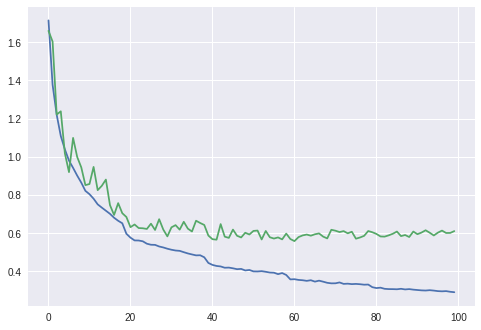

In [22]:
plt.plot(squeezenet_his.history['loss'])
plt.plot(squeezenet_his.history['val_loss'])

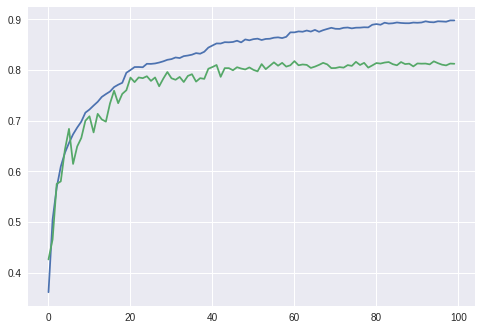

In [23]:
plt.plot(squeezenet_his.history['acc'])
plt.plot(squeezenet_his.history['val_acc'])

In [24]:
print("# of Parameter Reduction: ~%fx" % (22559626 / 378914))

# of Parameter Reduction: ~59.537589x
